In [2]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.utils import resample

# Read the four CSV files into Pandas DataFrames
df_f1_part1 = pd.read_csv('f1_part1.csv')
df_f1_part2 = pd.read_csv('f1_part2.csv')
df_f2_part1 = pd.read_csv('f2_part1.csv')
df_f2_part2 = pd.read_csv('f2_part2.csv')

# Concatenate the DataFrames vertically
combined_df = pd.concat([df_f1_part1, df_f1_part2, df_f2_part1, df_f2_part2], ignore_index=True)

# Display the columns of the combined DataFrame
print("Columns of the combined DataFrame:")
print(combined_df.columns)

Columns of the combined DataFrame:
Index(['timestamp_call_key', 'retailer_code', 'serial', 'reason', 'mos',
       'resolved', 'no_of_accounts_with_syf_13_march',
       'account_balance_13_march', 'delinquency_history_13_march',
       'account_open_date_13_march', 'account_status_13_march',
       'card_activation_status_13_march', 'eservice_ind_13_march',
       'ebill_enrolled_status_13_march', 'auto_pay_enrolled_status_13_march',
       'no_of_accounts_with_syf_18_march', 'account_balance_18_march',
       'delinquency_history_18_march', 'account_open_date_18_march',
       'account_status_18_march', 'card_activation_status_18_march',
       'eservice_ind_18_march', 'ebill_enrolled_status_18_march',
       'auto_pay_enrolled_status_18_march'],
      dtype='object')


In [3]:
combined_df.head()

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,auto_pay_enrolled_status_13_march,no_of_accounts_with_syf_18_march,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march
0,240315173250 DAL1OA3M,D,10010009499,PP,IA PP TR,resolved,1.0,NaN,[00],5/19/2013,...,0,1.0,NaN,[00],5/19/2013,NaN,0,1,E,0
1,240315124742 DAL15XHK,E,10006021998,BA,IA BA TS nl TR,floor,2.0,143.28,[00],9/22/2003,...,0,2.0,143.28,[00],9/22/2003,NaN,0,1,E,0
2,240317114237 DAL3BLK6,J,10016007830,PT,IA AA BA MR nl PT TR,resolved,12.0,0.00,[00],9/4/2017,...,0,12.0,0.00,[00],9/4/2017,NaN,8,0,,0
3,240314120849 PHX6PL4U,E,10008003199,BA,IA BA,resolved,2.0,44.98,[00],2/7/2024,...,0,2.0,-6.32,[00],2/7/2024,NaN,0,0,L,0
4,240314145902 DAL68RYS,I,10013002037,BA,IA BA TS nl mm TR,floor,6.0,7.00,[00],1/2/2022,...,0,6.0,7.00,[00],1/2/2022,NaN,0,1,,0


In [4]:
duplicated_serials = combined_df[combined_df['serial'].duplicated(keep=False)]
duplicated_serials

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,auto_pay_enrolled_status_13_march,no_of_accounts_with_syf_18_march,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march
4,240314145902 DAL68RYS,I,10013002037,BA,IA BA TS nl mm TR,floor,6.0,7.00,[00],1/2/2022,...,0,6.0,7.00,[00],1/2/2022,NaN,0,1,,0
5,240314151323 PHX4I30S,I,10013002037,PS,IA BA TS nl PS nl mt RS TR,floor,6.0,7.00,[00],1/2/2022,...,0,6.0,7.00,[00],1/2/2022,NaN,0,1,,0
7,240316171347 PHX4I164,B,10002094529,BA,IA BA,resolved,6.0,0.00,[00],9/13/2020,...,0,6.0,0.00,[00],9/13/2020,NaN,0,0,,0
8,240316171945 DAL16OYM,B,10002094529,BA,IA IA IA BA,resolved,6.0,0.00,[00],9/13/2020,...,0,6.0,0.00,[00],9/13/2020,NaN,0,0,,0
17,240314081235 DAL1ROPP,I,10013000316,BA,IA AA BA MR nl TR,floor,2.0,8.37,[00],2/5/2024,...,0,2.0,0.00,[00],2/5/2024,F,7,0,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798787,240315101845 PHX3VAJ9,f,20006017345,PP,IA PP TR,resolved,3.0,479.33,[00],8/16/2023,...,0,3.0,479.33,[00],8/16/2023,NaN,0,0,,0
1798791,240314075300 PHX5SRLR,b,20002002187,PP,mn IA PP TR,resolved,9.0,680.86,[00],12/19/2023,...,0,9.0,680.86,[00],12/19/2023,NaN,0,0,NaN,0
1798792,240314080117 DAL3CVDQ,b,20002002187,BA,mn IA PP BA MR nl WA nl BA nl mt,floor,9.0,680.86,[00],12/19/2023,...,0,9.0,680.86,[00],12/19/2023,NaN,0,0,NaN,0
1798793,240314120118 DAL2JPAQ,i,20012001463,BA,IA BA TA nl,resolved,14.0,1314.94,[00],2/8/2022,...,0,14.0,1314.94,[00],2/8/2022,NaN,0,0,,0


In [ ]:
value_counts = duplicated_serials['serial'].value_counts()
max_recalls = value_counts.max()
max_recalls

47

KeyboardInterrupt: 

In [ ]:
values_with_max_recalls = value_counts[value_counts == max_recalls].index
rows_with_max_recalls = duplicated_serials[duplicated_serials['serial'].isin(values_with_max_recalls)]
rows_with_max_recalls

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,auto_pay_enrolled_status_13_march,no_of_accounts_with_syf_18_march,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march
260237,240314015025 PHX7K2IX,D,10023000027,AT,IA BA MR nl AT,resolved,7.0,NaN,[00],8/12/2019,...,0,7.0,NaN,[00],8/12/2019,NaN,0,0,,0
260238,240314092243 DAL5BNPX,D,10023000027,AT,IA BA MR nl AT,resolved,7.0,NaN,[00],8/12/2019,...,0,7.0,NaN,[00],8/12/2019,NaN,0,0,,0
260239,240314101732 DAL3OMIM,D,10023000027,BA,IA BA,resolved,7.0,NaN,[00],8/12/2019,...,0,7.0,NaN,[00],8/12/2019,NaN,0,0,,0
260240,240314101858 DAL5TLUG,D,10023000027,AT,IA BA MR nl AT,resolved,7.0,NaN,[00],8/12/2019,...,0,7.0,NaN,[00],8/12/2019,NaN,0,0,,0
260241,240314125532 PHX3HDFE,D,10023000027,CT,IA BA MR nl AT nl CT mt RS TR,floor,7.0,NaN,[00],8/12/2019,...,0,7.0,NaN,[00],8/12/2019,NaN,0,0,,0
260242,240314162029 PHX3KJNH,D,10023000027,AT,IA BA MR nl AT,resolved,7.0,NaN,[00],8/12/2019,...,0,7.0,NaN,[00],8/12/2019,NaN,0,0,,0
260243,240314180025 PHX3YJW9,D,10023000027,AT,IA BA MR nl AT,resolved,7.0,NaN,[00],8/12/2019,...,0,7.0,NaN,[00],8/12/2019,NaN,0,0,,0
260244,240314184430 PHX6RD93,D,10023000027,BA,IA BA,resolved,7.0,NaN,[00],8/12/2019,...,0,7.0,NaN,[00],8/12/2019,NaN,0,0,,0
260245,240314224607 DAL18VQR,D,10023000027,BA,IA BA,resolved,7.0,NaN,[00],8/12/2019,...,0,7.0,NaN,[00],8/12/2019,NaN,0,0,,0
260246,240315003551 DAL6BBOV,D,10023000027,BA,IA BA,resolved,7.0,NaN,[00],8/12/2019,...,0,7.0,NaN,[00],8/12/2019,NaN,0,0,,0


In [ ]:
num_unique_recalls = duplicated_serials["serial"].nunique()
num_unique_recalls

214468

In [ ]:
len(combined_df) - combined_df["serial"].nunique()

290795

In [ ]:
combined_df["reason"].nunique()

73

In [ ]:
combined_df["date"] = [int(value[0:6]) for value in combined_df['timestamp_call_key']]
combined_df.head()

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,no_of_accounts_with_syf_18_march,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,date
0,240315173250 DAL1OA3M,D,10010009499,PP,IA PP TR,resolved,1.0,NaN,[00],5/19/2013,...,1.0,NaN,[00],5/19/2013,NaN,0,1,E,0,240315
1,240315124742 DAL15XHK,E,10006021998,BA,IA BA TS nl TR,floor,2.0,143.28,[00],9/22/2003,...,2.0,143.28,[00],9/22/2003,NaN,0,1,E,0,240315
2,240317114237 DAL3BLK6,J,10016007830,PT,IA AA BA MR nl PT TR,resolved,12.0,0.00,[00],9/4/2017,...,12.0,0.00,[00],9/4/2017,NaN,8,0,,0,240317
3,240314120849 PHX6PL4U,E,10008003199,BA,IA BA,resolved,2.0,44.98,[00],2/7/2024,...,2.0,-6.32,[00],2/7/2024,NaN,0,0,L,0,240314
4,240314145902 DAL68RYS,I,10013002037,BA,IA BA TS nl mm TR,floor,6.0,7.00,[00],1/2/2022,...,6.0,7.00,[00],1/2/2022,NaN,0,1,,0,240314


In [ ]:
combined_df['recalls'] = combined_df.groupby('serial')['serial'].transform('size')
combined_df

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,date,recalls
0,240315173250 DAL1OA3M,D,10010009499,PP,IA PP TR,resolved,1.0,NaN,[00],5/19/2013,...,NaN,[00],5/19/2013,NaN,0,1,E,0,240315,1
1,240315124742 DAL15XHK,E,10006021998,BA,IA BA TS nl TR,floor,2.0,143.28,[00],9/22/2003,...,143.28,[00],9/22/2003,NaN,0,1,E,0,240315,1
2,240317114237 DAL3BLK6,J,10016007830,PT,IA AA BA MR nl PT TR,resolved,12.0,0.00,[00],9/4/2017,...,0.00,[00],9/4/2017,NaN,8,0,,0,240317,1
3,240314120849 PHX6PL4U,E,10008003199,BA,IA BA,resolved,2.0,44.98,[00],2/7/2024,...,-6.32,[00],2/7/2024,NaN,0,0,L,0,240314,1
4,240314145902 DAL68RYS,I,10013002037,BA,IA BA TS nl mm TR,floor,6.0,7.00,[00],1/2/2022,...,7.00,[00],1/2/2022,NaN,0,1,,0,240314,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798793,240314120118 DAL2JPAQ,i,20012001463,BA,IA BA TA nl,resolved,14.0,1314.94,[00],2/8/2022,...,1314.94,[00],2/8/2022,NaN,0,0,,0,240314,2
1798794,240314120336 DAL4K2UN,i,20012001463,BA,IA BA,resolved,14.0,1314.94,[00],2/8/2022,...,1314.94,[00],2/8/2022,NaN,0,0,,0,240314,2
1798795,240316190932 PHX2S13U,a,20001160188,PP,IA PP TR,resolved,7.0,35.66,[00],8/24/2023,...,35.66,[00],8/24/2023,NaN,0,0,,0,240316,1
1798796,240317213341 PHX35A2C,d,20010020211,FD,IA IA TR,floor,8.0,386.63,[00],5/15/2019,...,386.63,[00],5/15/2019,A,0,1,L,0,240317,1


In [ ]:
combined_df['same_day_recalls'] = combined_df.groupby(['date', 'serial'])['serial'].transform('size')
combined_df


,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,date,recalls,same_day_recalls
0,240315173250 DAL1OA3M,D,10010009499,PP,IA PP TR,resolved,1.0,NaN,[00],5/19/2013,...,[00],5/19/2013,NaN,0,1,E,0,240315,1,1
1,240315124742 DAL15XHK,E,10006021998,BA,IA BA TS nl TR,floor,2.0,143.28,[00],9/22/2003,...,[00],9/22/2003,NaN,0,1,E,0,240315,1,1
2,240317114237 DAL3BLK6,J,10016007830,PT,IA AA BA MR nl PT TR,resolved,12.0,0.00,[00],9/4/2017,...,[00],9/4/2017,NaN,8,0,,0,240317,1,1
3,240314120849 PHX6PL4U,E,10008003199,BA,IA BA,resolved,2.0,44.98,[00],2/7/2024,...,[00],2/7/2024,NaN,0,0,L,0,240314,1,1
4,240314145902 DAL68RYS,I,10013002037,BA,IA BA TS nl mm TR,floor,6.0,7.00,[00],1/2/2022,...,[00],1/2/2022,NaN,0,1,,0,240314,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798793,240314120118 DAL2JPAQ,i,20012001463,BA,IA BA TA nl,resolved,14.0,1314.94,[00],2/8/2022,...,[00],2/8/2022,NaN,0,0,,0,240314,2,2
1798794,240314120336 DAL4K2UN,i,20012001463,BA,IA BA,resolved,14.0,1314.94,[00],2/8/2022,...,[00],2/8/2022,NaN,0,0,,0,240314,2,2
1798795,240316190932 PHX2S13U,a,20001160188,PP,IA PP TR,resolved,7.0,35.66,[00],8/24/2023,...,[00],8/24/2023,NaN,0,0,,0,240316,1,1
1798796,240317213341 PHX35A2C,d,20010020211,FD,IA IA TR,floor,8.0,386.63,[00],5/15/2019,...,[00],5/15/2019,A,0,1,L,0,240317,1,1


In [ ]:
serial_sorted = combined_df.sort_values(by='serial')
serial_sorted.head(10)

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,date,recalls,same_day_recalls
185545,240313235613 PHX6KLJV,A,10001000001,IC,IA BA TS nl BA nl nl mp mm IC,resolved,3.0,2246.76,[00],11/5/2020,...,[00],11/5/2020,NaN,0,1,E,0,240313,5,1
185544,240316200813 PHX2SWIT,A,10001000001,PT,IA BA TS nl PT TR,resolved,3.0,2246.76,[00],11/5/2020,...,[00],11/5/2020,NaN,0,1,E,0,240316,5,4
185543,240316195355 PHX2XRNF,A,10001000001,mp,IA BA TS nl mp TR,resolved,3.0,2246.76,[00],11/5/2020,...,[00],11/5/2020,NaN,0,1,E,0,240316,5,4
185542,240316122342 PHX1H82J,A,10001000001,mp,IA BA TS nl nl mp,resolved,3.0,2246.76,[00],11/5/2020,...,[00],11/5/2020,NaN,0,1,E,0,240316,5,4
185541,240316112732 DAL7PM38,A,10001000001,BA,IA BA,resolved,3.0,2246.76,[00],11/5/2020,...,[00],11/5/2020,NaN,0,1,E,0,240316,5,4
419218,240314000933 PHX2ILKM,A,10001000002,FD,IA FI TR,floor,4.0,986.42,[00],7/6/2021,...,[00],7/6/2021,NaN,0,0,L,0,240314,4,3
419217,240313235657 DAL1BBRQ,A,10001000002,IC,IA DR IC TC nl IC TR,floor,4.0,986.42,[00],7/6/2021,...,[00],7/6/2021,NaN,0,0,L,0,240313,4,1
419220,240314014340 PHX77N2E,A,10001000002,BA,IA BA MR nl mt RS TR,floor,4.0,986.42,[00],7/6/2021,...,[00],7/6/2021,NaN,0,0,L,0,240314,4,3
419219,240314001731 PHX1UIW6,A,10001000002,FD,IA FI TR,floor,4.0,986.42,[00],7/6/2021,...,[00],7/6/2021,NaN,0,0,L,0,240314,4,3
287154,240313235835 PHX2NKFQ,A,10001000004,FD,IA FI TR,floor,5.0,0.00,[00],9/7/2023,...,[00],9/7/2023,L,0,0,L,0,240313,1,1


In [ ]:
contingency_table = pd.crosstab(combined_df['reason'], combined_df['same_day_recalls'])

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("P-value:", p)
print(chi2)

P-value: 0.0
48912.47605537181


In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramer_v_score = cramers_v(combined_df['reason'], combined_df['same_day_recalls'])
cramer_v_score

0.03834893829433789

In [ ]:
from scipy.stats import f_oneway
result = f_oneway(*(combined_df['recalls'][combined_df['reason'] == category] for category in combined_df['reason'].unique()))

print("ANOVA F-statistic:", result.statistic)
print("ANOVA p-value:", result.pvalue)

ANOVA F-statistic: 2030.3885303352404
ANOVA p-value: 0.0


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into a DataFrame called combined_df

# Drop any rows with missing values in 'reason' or 'recalls' columns
combined_df.dropna(subset=['reason', 'recalls'], inplace=True)

# Convert 'recalls' column to numeric (assuming it's not already)
combined_df['recalls'] = pd.to_numeric(combined_df['recalls'], errors='coerce')

# Encode categorical data ('reason' column) into numerical labels
combined_df['reason_encoded'] = combined_df['reason'].astype('category').cat.codes

# Selecting columns for clustering
X = combined_df[['reason_encoded', 'recalls']]

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):  # You can adjust the range of clusters to test
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

NameError: name 'combined_df' is not defined

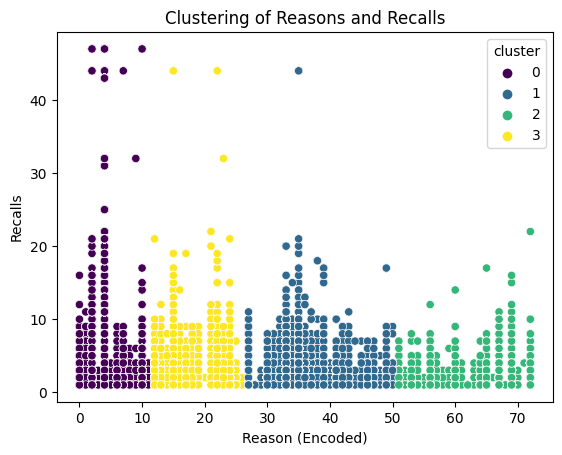

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into a DataFrame called combined_df

# Drop any rows with missing values in 'reason' or 'recalls' columns
combined_df.dropna(subset=['reason', 'recalls'], inplace=True)

# Convert 'recalls' column to numeric (assuming it's not already)
combined_df['recalls'] = pd.to_numeric(combined_df['recalls'], errors='coerce')

# Encode categorical data ('reason' column) into numerical labels
combined_df['reason_encoded'] = combined_df['reason'].astype('category').cat.codes

# Selecting columns for clustering
X = combined_df[['reason_encoded', 'recalls']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4)  # You can change the number of clusters as per your requirement
kmeans.fit(X)

# Add cluster labels to the DataFrame
combined_df['cluster'] = kmeans.labels_

# Plotting the clusters
sns.scatterplot(data=combined_df, x='reason_encoded', y='recalls', hue='cluster', palette='viridis')
plt.xlabel('Reason (Encoded)')
plt.ylabel('Recalls')
plt.title('Clustering of Reasons and Recalls')
plt.show()


In [ ]:
combined_df["mos_len"] = [len(mos.split(" ")) for mos in combined_df['mos']]
proportion_floored = []
for length in combined_df["mos_len"].unique():
    num_floored = 

SyntaxError: invalid syntax (1673898147.py, line 4)